In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [ ]:
Place: noi ban
ProductID: ma san pham
Umld: ma don vi do luong
UmName: ten don vi do luon
Month: thang
Year: Nam
Price: gia

In [4]:
# read_data
df = pd.read_csv(r"D:\DAP2304R1_DATA-ANALYSIS\Tiền xử lý dữ liệu_2\DATA\FoodPrice_in_Turkey.csv", encoding = "ISO-8859-1")

# print out the data size
df.shape

(7381, 8)

In [8]:
#data discription
df.describe(include = 'all')

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
count,7381,7381.000000,7381,7381.000000,7381,7381.000000,7381.000000,7381.000000
unique,4,NaN,52,NaN,9,NaN,NaN,NaN
top,National Average,NaN,Rice - Retail,NaN,KG,NaN,NaN,NaN
freq,2633,NaN,174,NaN,5636,NaN,NaN,NaN
mean,NaN,254.509687,NaN,15.252811,NaN,6.479881,2017.458474,15.738709
std,NaN,141.008599,NaN,25.276665,NaN,3.530361,1.499256,22.418284
min,NaN,52.000000,NaN,5.000000,NaN,1.000000,2013.000000,0.253900
25%,NaN,114.000000,NaN,5.000000,NaN,3.000000,2017.000000,3.223600
50%,NaN,239.000000,NaN,5.000000,NaN,6.000000,2018.000000,5.909600
75%,NaN,388.000000,NaN,5.000000,NaN,10.000000,2019.000000,20.441900


In [9]:
# data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [11]:
# check for missing data

df.isna().sum()

Place          0
ProductId      0
ProductName    0
UmId           0
UmName         0
Month          0
Year           0
Price          0
dtype: int64

In [13]:
# delete lines containing missing values

df1 = df.dropna()
df.shape

(7381, 8)

<Axes: >

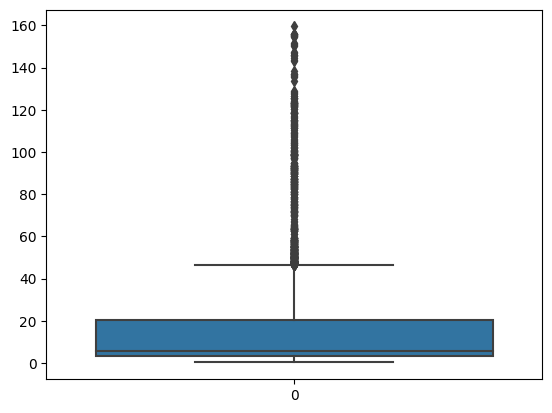

In [14]:
# outlier data processing for the Price. feature

sns.boxplot(df.Price)

In [20]:
target = df[(df.Price >= 1) & (df.Price <= 15)]
target

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7340,Izmir,493,Water - Retail,100,Cubic meter,8,2019,5.0664
7341,Izmir,493,Water - Retail,100,Cubic meter,9,2019,5.0664
7342,Izmir,493,Water - Retail,100,Cubic meter,10,2019,5.0664
7343,Izmir,493,Water - Retail,100,Cubic meter,11,2019,5.0664


<Axes: >

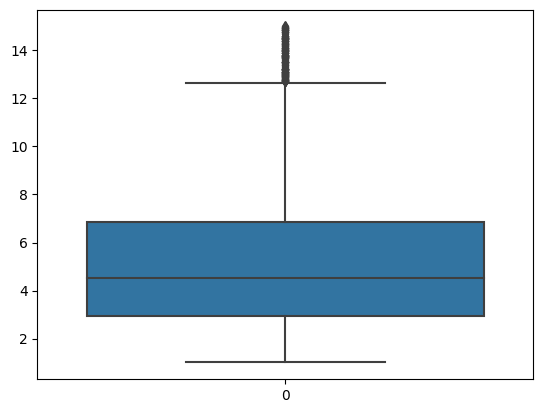

In [21]:
sns.boxplot(target.Price)

<Axes: xlabel='Price', ylabel='Density'>

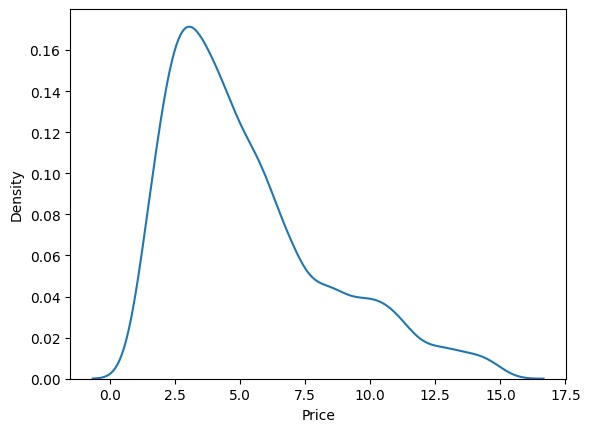

In [22]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=target['Price'])

In [24]:
# remove outlier with IQR score

q1 = df1['Price'].quantile(0.25)
q3 = df1['Price'].quantile(0.75)
iqr = q3 - q1

In [2]:
# đọc dữ liệu
df = pd.read_csv(r"D:\DAP2304R1_DATA-ANALYSIS\Tiền xử lý dữ liệu_2\DATA\FoodPrice_in_Turkey.csv", encoding = "ISO-8859-1")

# in ra kich thuoc du lieu
df.shape

(7381, 8)

In [3]:
# data description
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [4]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [5]:
# check for missing data
df.isna().sum()

Place          0
ProductId      0
ProductName    0
UmId           0
UmName         0
Month          0
Year           0
Price          0
dtype: int64

In [6]:
# check data is not missing 
df.notna().sum()

Place          7381
ProductId      7381
ProductName    7381
UmId           7381
UmName         7381
Month          7381
Year           7381
Price          7381
dtype: int64

In [7]:
# delete lines containing missing values
df1 = df.dropna()
df1.shape

(7381, 8)

<Axes: xlabel='Price'>

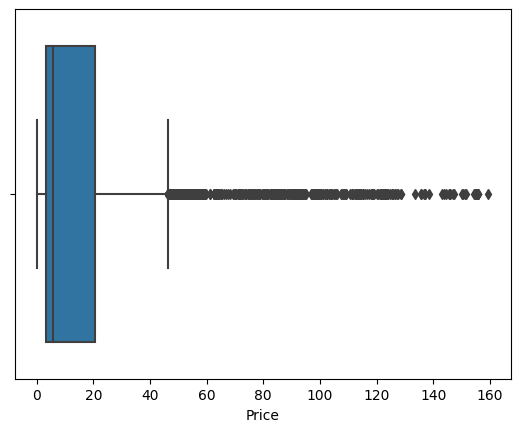

In [8]:
# draw a box plot for the data in the price column
    
sns.boxplot(x=df1['Price']) 

In [40]:
# remove outliers with IQR score
q1 = df1['Price'].quantile(0.25)
q3 = df1['Price'].quantile(0.75)
iqr = q3 - q1

In [87]:
# identify non-outlier element
df2 = df1
df2['outlier'] = ~((df1['Price'] < (q1 - 1.5*iqr)) | (df1['Price'] > (q3 + 0 * iqr)))
df2['outlier'].value_counts()

True     5536
False    1845
Name: outlier, dtype: int64

In [88]:
# xóa phần tử ngoại lai
df2 = df2[df2['outlier'] == True]

<Axes: xlabel='Price'>

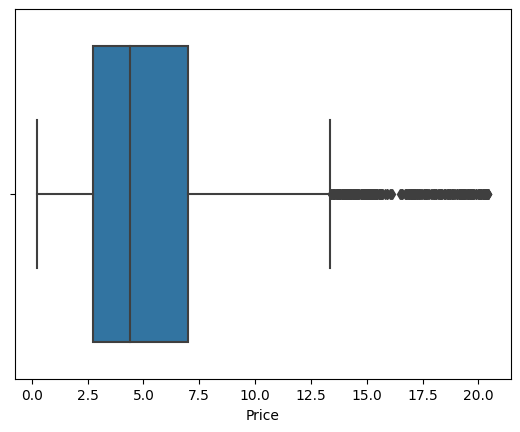

In [89]:
# draw a box plot for the data in price column
sns.boxplot (x = df2['Price'])

In [52]:
# data description
df2['Price'].describe()

count    6784.000000
mean       10.503617
std        11.661447
min         0.253900
25%         3.079550
50%         5.373350
75%        11.541925
max        46.251900
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

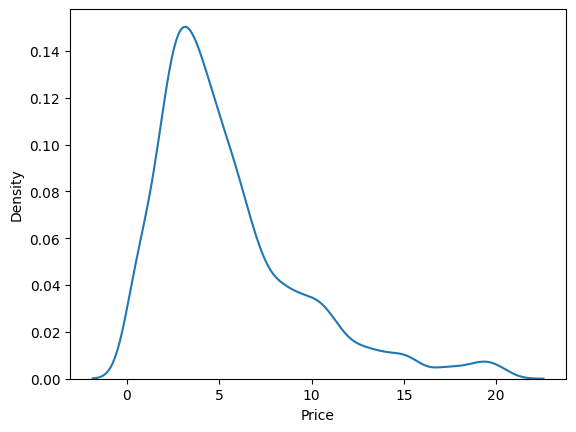

In [90]:
#data distribution chart
sns.kdeplot(data = df2.Price)

In [54]:
# normalize data with minmax scaling
scaler = MinMaxScaler()

In [62]:
# normalize data in df with minmax scaling in 2 columns Price
df_s = scaler.fit_transform(df2[['Price']])
df_s

array([[0.09213661],
       [0.09401931],
       [0.09853907],
       ...,
       [0.97740337],
       [0.98164268],
       [0.97957737]])

In [70]:
# post normalization data description
pd.DataFrame(df_s).describe()

,0
count,6784.000000
mean,0.222830
std,0.253521
min,0.000000
25%,0.061430
50%,0.111297
75%,0.245403
max,1.000000


<Axes: >

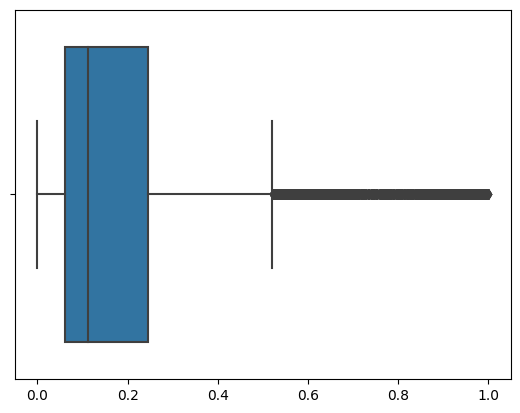

In [64]:
# redraw the box chart
sns.boxplot(x=df_s)

<Axes: ylabel='Density'>

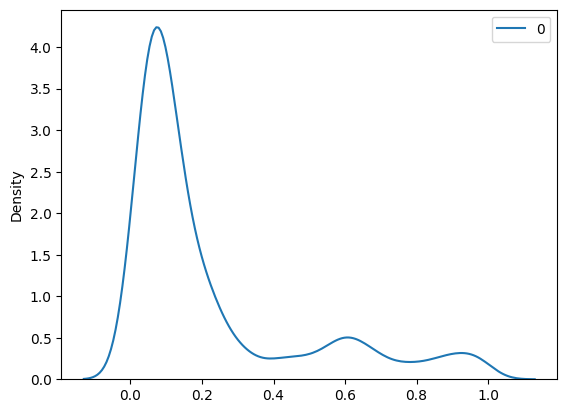

In [65]:
# data distribution chart
sns.kdeplot(data=df_s)

In [71]:
# normalize data with robust scaling
scaler = RobustScaler()
df_r = scaler.fit_transform(df2[["Price"]])

In [72]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_r).describe()

,0
count,6.784000e+03
mean,6.062443e-01
std,1.378035e+00
min,-6.049661e-01
25%,-2.710587e-01
50%,-5.247539e-17
75%,7.289413e-01
max,4.830624e+00


<Axes: >

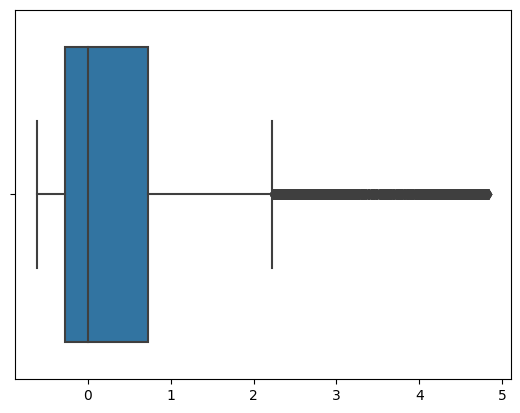

In [24]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

<Axes: ylabel='Density'>

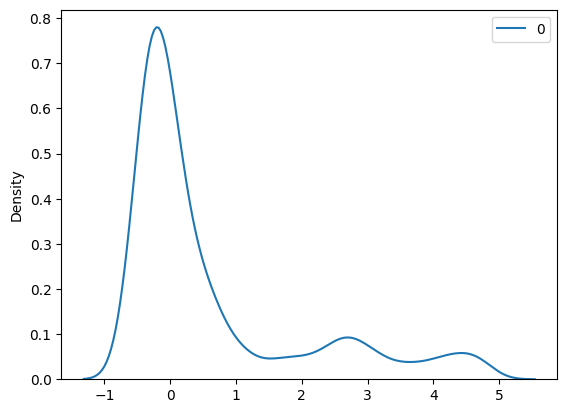

In [25]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df_s)

In [26]:
# chuẩn hóa dữ liệu với z-score scaling
scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [27]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()


,0
count,6.784000e+03
mean,-1.984786e-16
std,1.000074e+00
min,-8.790052e-01
25%,-6.366803e-01
50%,-4.399664e-01
75%,8.904423e-02
max,3.065736e+00


<Axes: >

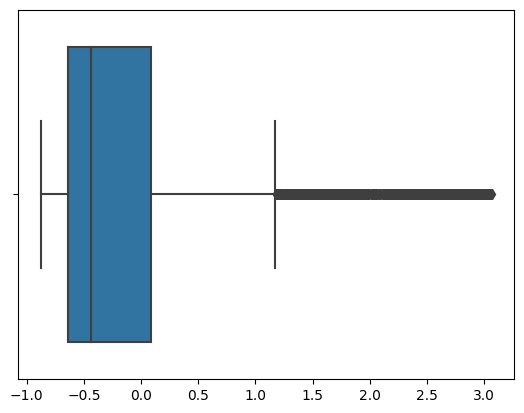

In [28]:
sns.boxplot(x=df_s)

<Axes: ylabel='Density'>

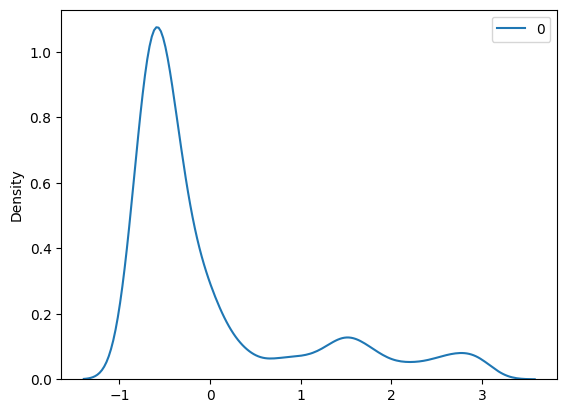

In [29]:
sns.kdeplot(data=df_s)

In [30]:
# các giá trị ở cột ProductName
df2['ProductName'].unique().tolist()

['Rice - Retail',
 'Wheat flour - Retail',
 'Beans (white) - Retail',
 'Potatoes - Retail',
 'Eggs - Retail',
 'Meat (chicken) - Retail',
 'Sugar - Retail',
 'Garlic - Retail',
 'Lentils - Retail',
 'Pasta - Retail',
 'Tomatoes - Retail',
 'Groundnuts (shelled) - Retail',
 'Bread (common) - Retail',
 'Coffee - Retail',
 'Onions - Retail',
 'Tea (green) - Retail',
 'Cabbage - Retail',
 'Meat (mutton) - Retail',
 'Oil (sunflower) - Retail',
 'Salt - Retail',
 'Coffee (instant) - Retail',
 'Peas (green, dry) - Retail',
 'Apples (red) - Retail',
 'Cauliflower - Retail',
 'Cucumbers (greenhouse) - Retail',
 'Oil (olive) - Retail',
 'Chickpeas - Retail',
 'Bananas - Retail',
 'Bulgur - Retail',
 'Tea - Retail',
 'Fuel (petrol-gasoline) - Retail',
 'Transport (public) - Retail',
 'Tomatoes (paste) - Retail',
 'Fuel (gas) - Retail',
 'Apples - Retail',
 'Oranges - Retail',
 'Yogurt - Retail',
 'Bread (pita) - Retail',
 'Cucumbers - Retail',
 'Fish (fresh) - Retail',
 'Spinach - Retail',
 'Chee

In [31]:
# mã hóa cột ProductName với One-hot encoder sử dụng scikit learn
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(np.asarray(df2['ProductName']).reshape(-1,1))
encoded_data.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
# mã hóa cột ProductName với One-hot encoder sử dụng pandas
pd.get_dummies(df2['ProductName'])

,Apples (red) - Retail,Apples - Retail,Bananas - Retail,Beans (white) - Retail,Bread (common) - Retail,Bread (pita) - Retail,Bulgur - Retail,Cabbage - Retail,Cauliflower - Retail,Cheese - Retail,...,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Transport (public) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# mã hóa cột ProductName với Label encoder sử dụng scikit learn
encoder = LabelEncoder()

encoded_data = encoder.fit_transform(np.asarray(df2['ProductName']))
encoded_data

array([36, 36, 36, ..., 11, 11, 11])

In [34]:
# mã hóa cột ProductName với Label encoder sử dụng pandas
df2['ProductName'].astype('category').cat.codes

0       36
1       36
2       36
3       36
4       36
        ..
7369    11
7370    11
7371    11
7372    11
7373    11
Length: 6784, dtype: int8

In [35]:
df2.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,outlier
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,True
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,True
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,True
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,True
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,True


In [36]:
# Rời rạc hóa dữ liệu ở cột Price

# chia thành 5 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df2['Price'], 5)
cats

0         (0.208, 9.454]
1         (0.208, 9.454]
2         (0.208, 9.454]
3         (0.208, 9.454]
4         (0.208, 9.454]
              ...       
7369    (37.052, 46.252]
7370    (37.052, 46.252]
7371    (37.052, 46.252]
7372    (37.052, 46.252]
7373    (37.052, 46.252]
Name: Price, Length: 6784, dtype: category
Categories (5, interval[float64, right]): [(0.208, 9.454] < (9.454, 18.653] < (18.653, 27.853] < (27.853, 37.052] < (37.052, 46.252]]

In [37]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(0.208, 9.454]      4711
(9.454, 18.653]      743
(18.653, 27.853]     474
(27.853, 37.052]     449
(37.052, 46.252]     407
Name: Price, dtype: int64

In [38]:
# chia thành 5 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df2['Price'], 5)
cats

0          (4.315, 6.81]
1          (4.315, 6.81]
2          (4.315, 6.81]
3          (4.315, 6.81]
4          (4.315, 6.81]
              ...       
7369    (17.637, 46.252]
7370    (17.637, 46.252]
7371    (17.637, 46.252]
7372    (17.637, 46.252]
7373    (17.637, 46.252]
Name: Price, Length: 6784, dtype: category
Categories (5, interval[float64, right]): [(0.253, 2.694] < (2.694, 4.315] < (4.315, 6.81] < (6.81, 17.637] < (17.637, 46.252]]

In [39]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(0.253, 2.694]      1358
(4.315, 6.81]       1357
(17.637, 46.252]    1357
(2.694, 4.315]      1356
(6.81, 17.637]      1356
Name: Price, dtype: int64